In [1]:
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('heart_disease.csv')
df = df.dropna()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
len(df)# given the length of the cell

7067

In [3]:
df.head()#add a brief look on the database

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,44.0,Female,128.0,289.0,High,Yes,Yes,Yes,25.329838,Yes,...,No,Medium,Medium,9.186045,High,119.0,138.0,6.645268,19.458495,No
1,54.0,Male,151.0,196.0,Low,No,Yes,No,38.276204,Yes,...,No,High,Low,8.381630,Low,329.0,81.0,8.809437,9.223301,No
2,40.0,Male,130.0,163.0,Medium,No,No,Yes,35.081813,Yes,...,No,Low,Low,9.432509,Low,293.0,91.0,9.563376,13.823464,No
3,50.0,Male,173.0,216.0,High,Yes,No,No,26.942332,No,...,Yes,Medium,Medium,7.615374,Medium,393.0,92.0,6.369999,12.541149,No
4,59.0,Male,134.0,174.0,High,Yes,Yes,No,26.414323,Yes,...,Yes,Medium,Low,8.164886,Medium,316.0,118.0,14.600263,18.688312,No


In [4]:
pd.set_option('future.no_silent_downcasting', True)
df.replace({'Heart Disease Status': {'No': 0, 'Yes': 1}}, inplace=True)
target = df['Heart Disease Status']

In [5]:
columns = df.columns.to_list()
columns.remove('Heart Disease Status')
df = pd.get_dummies(df[columns])

In [6]:
df = pd.concat([df, target], axis=1)
df.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Female,...,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status
0,44.0,128.0,289.0,25.329838,9.186045,119.0,138.0,6.645268,19.458495,True,...,False,False,True,False,False,True,True,False,False,0
1,54.0,151.0,196.0,38.276204,8.381630,329.0,81.0,8.809437,9.223301,False,...,True,False,False,False,True,False,False,True,False,0
2,40.0,130.0,163.0,35.081813,9.432509,293.0,91.0,9.563376,13.823464,False,...,False,True,False,False,True,False,False,True,False,0
3,50.0,173.0,216.0,26.942332,7.615374,393.0,92.0,6.369999,12.541149,False,...,False,False,True,False,False,True,False,False,True,0
4,59.0,134.0,174.0,26.414323,8.164886,316.0,118.0,14.600263,18.688312,False,...,False,False,True,False,True,False,False,False,True,0


In [7]:
Xy=np.array(df)
seed = np.random.seed(1)
np.random.shuffle(Xy)
X=Xy[:,:-1]
y=Xy[:,-1]
#define y
y=Xy[:,-1]

In [8]:
trainsize = int(len(df)/2)
trainplusvalsize = int(len(df)/4)
X_train=X[:trainsize]
X_val=X[trainsize:trainsize + trainplusvalsize]
X_test=X[trainsize + trainplusvalsize:]

y_train=y[:trainsize]
y_val=y[trainsize:trainsize + trainplusvalsize]
y_test=y[trainsize + trainplusvalsize:]

In [9]:
max_depth = 45
bestdepth=-1
bestscore = 0
for i in range(45):
    clf = tree.DecisionTreeClassifier(max_depth=i+1, random_state=1, class_weight='balanced')
    #fit the training sets
    clf.fit(X_train, y_train.astype(int))
    #update trainscore
    trainscore=clf.score(X_train, y_train.astype(int))
    #update valscore
    valscore=clf.score(X_val, y_val.astype(int))
    print('Depth:', i+1, 'Train Score:', trainscore, 'Validation Score:', valscore)
    if  valscore > bestscore:
        #update bestscore
        bestscore=valscore
        #update depth
        bestdepth=i+1       
print('Best depth', bestdepth, 'Best validation score:', round(bestscore,4))

Depth: 1 Train Score: 0.40135861873761675 Validation Score: 0.38901472253680636
Depth: 2 Train Score: 0.44240022643645627 Validation Score: 0.427519818799547
Depth: 3 Train Score: 0.41409566940277387 Validation Score: 0.39467723669309174
Depth: 4 Train Score: 0.4624964619303708 Validation Score: 0.41223103057757643
Depth: 5 Train Score: 0.4650438720634022 Validation Score: 0.398074745186863
Depth: 6 Train Score: 0.661760543447495 Validation Score: 0.572480181200453
Depth: 7 Train Score: 0.5491084064534391 Validation Score: 0.44847112117780297
Depth: 8 Train Score: 0.5762807812057741 Validation Score: 0.45016987542468856
Depth: 9 Train Score: 0.6139258420605718 Validation Score: 0.485277463193658
Depth: 10 Train Score: 0.6906311916218512 Validation Score: 0.5305775764439411
Depth: 11 Train Score: 0.7169544296631758 Validation Score: 0.5379388448471121
Depth: 12 Train Score: 0.7625247664874045 Validation Score: 0.5549263873159683
Depth: 13 Train Score: 0.7868666855363714 Validation Score

In [10]:
# for loop looking at RF with different max_features 

np.random.seed(1)
for max_features in ["sqrt",  None]:
    # build the rf classifier wwith different arguments for max_features
    #fit to the training data
    rf_clf = ensemble.RandomForestClassifier(
        max_features=max_features,
        random_state=1,
        min_samples_split=25,
        min_samples_leaf=10,
        max_depth=bestdepth,
        n_estimators=100
    )
    rf_clf.fit(X_train, y_train.astype(int))
    print ( f'Full tree guess train/validation {max_features}',rf_clf.score(X_train, y_train.astype(int)),rf_clf.score(X_val, y_val.astype(int)))


Full tree guess train/validation sqrt 0.7953580526464761 0.8029445073612684
Full tree guess train/validation None 0.7964902349278233 0.8029445073612684


In [11]:
ab_clf = ensemble.AdaBoostClassifier(
    estimator=tree.DecisionTreeClassifier(max_depth=10),
    n_estimators=100,
    learning_rate=0.1,
    random_state=1
)
ab_clf.fit(X_train, y_train.astype(int))

c:\Users\jimmy\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [12]:
print ( 'Full tree guess train/validation ',ab_clf.score(X_train, y_train.astype(int)),ab_clf.score(X_val, y_val.astype(int)))

Full tree guess train/validation  1.0 0.7938844847112118


In [13]:
X_trainval = X[:trainsize + trainplusvalsize, :]
y_trainval = y[:trainsize + trainplusvalsize]

best_clf=ab_clf
feature_importances = best_clf.feature_importances_
sorted_idx = np.argsort(feature_importances)

In [14]:
feature_names = np.array(df.columns[:-1])

In [15]:
def plot_impurity_metric_features( feature_importances, sorted_idx, feature_names):
    y_ticks = np.arange(0, len(feature_names))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(y_ticks, feature_importances[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(feature_names[sorted_idx])
    ax.set_title("Random Forest Feature Importances")
    fig.tight_layout()
    plt.show()

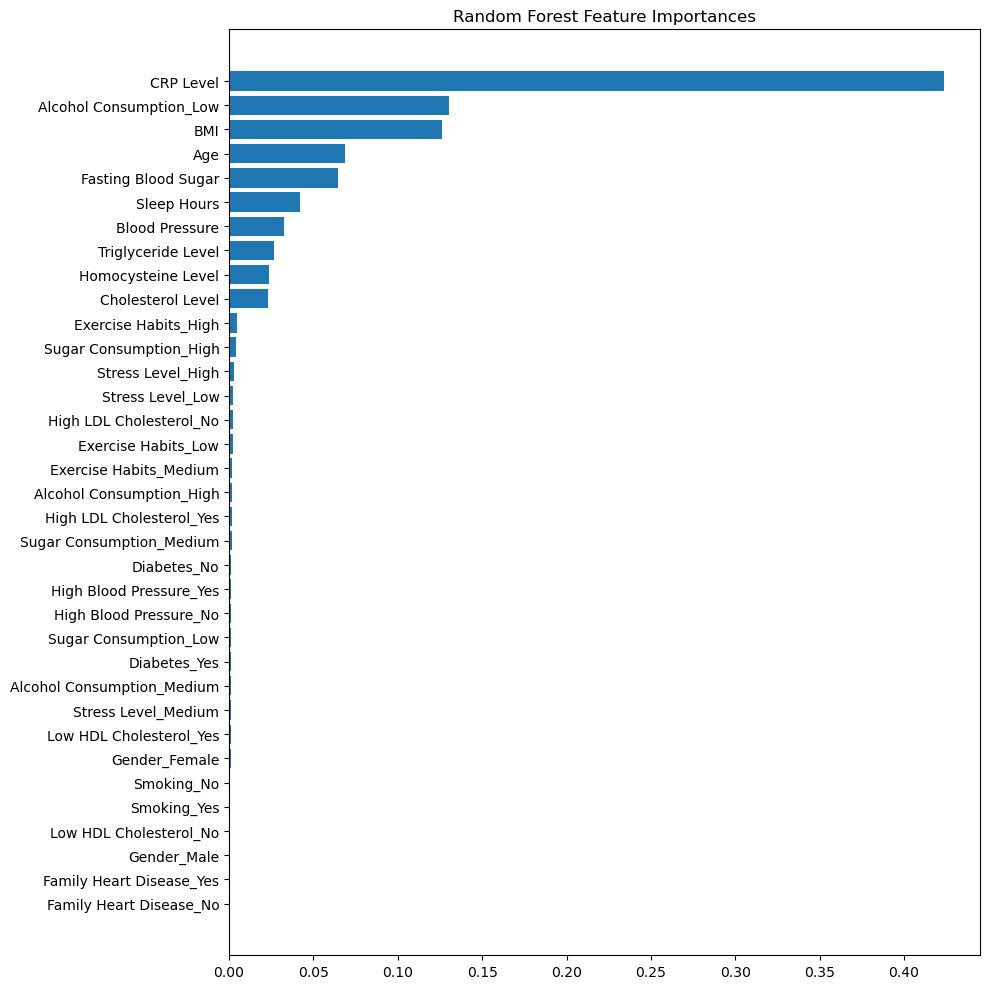

In [16]:
# plot the impurity metric feature importances 

plot_impurity_metric_features(feature_importances, sorted_idx, feature_names)

In [17]:
# permutation method on both training and test

result = permutation_importance(estimator=best_clf , X=X_trainval , y=y_trainval.astype(int) , n_repeats=10, random_state=1, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

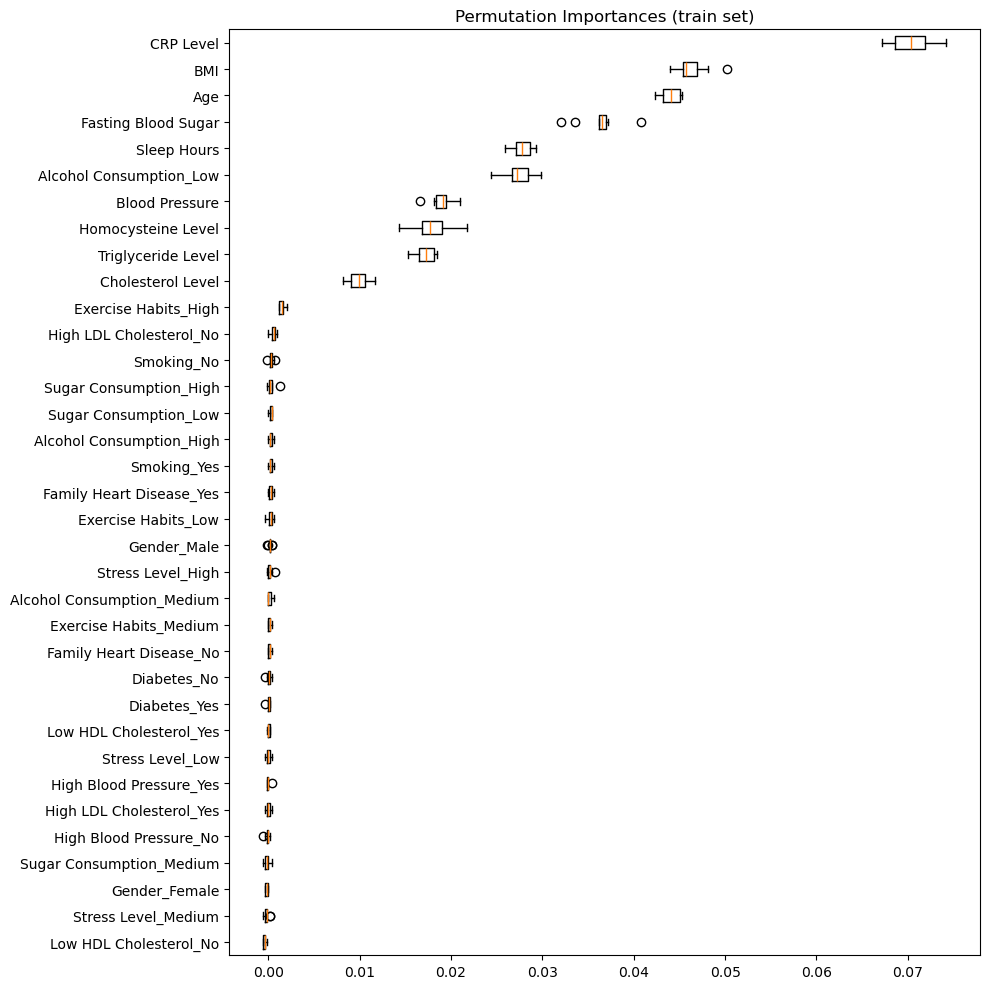

In [19]:
def plot_perm_importance(result, sorted_idx, feature_names):

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(
        result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx]
    )
    ax.set_title("Permutation Importances (train set)")
    fig.tight_layout()
    plt.show()
    
plot_perm_importance(result, sorted_idx, feature_names)


In [20]:
X_test = X_test.astype(float)
y_test = y_test.astype(float)

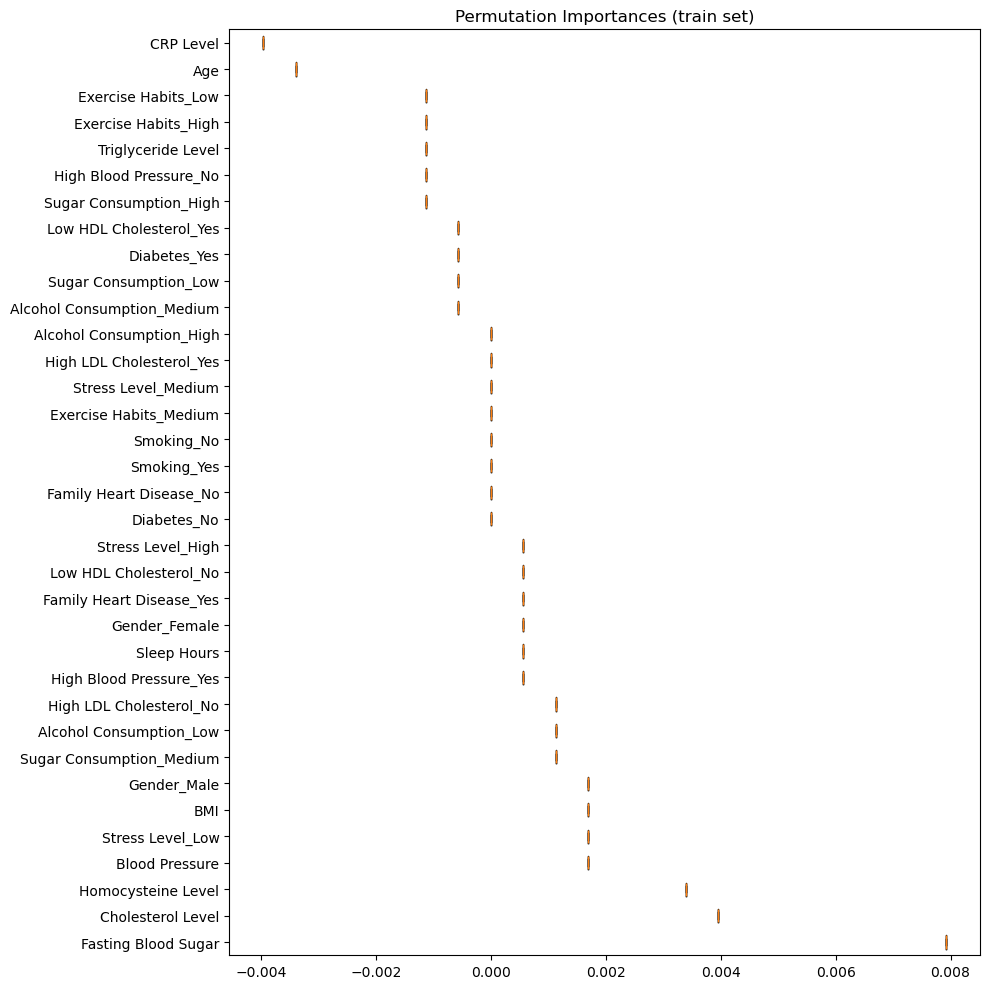

In [21]:
result = permutation_importance(estimator=best_clf , X=X_test , y=y_test, n_repeats=1, random_state=2, n_jobs=1
)
sorted_idx = result.importances_mean.argsort()[::-1]

plot_perm_importance(result, sorted_idx, feature_names)